In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings

# Вводим дополнительные надстройки
warnings.filterwarnings('ignore')
# Устанавливаем дополнительные настройки отображения данных в таблице (округление чисел до двух знаков после запятой)
pd.set_option('display.float_format', '{:.2f}'.format)
# Задаём стиль отрисовки графиков
plt.style.use('seaborn-dark')

## Задание 1. 
В таблице ниже приведена выборка абонентов и показателей по ним (ежемесячные начисления, трафик, тип устройства)

Необходимо подготовить выборку к анализу (выделить или исключить нехарактерные/потенциально ошибочные значения) и сделать сегментацию или несколько сегментаций, выделив 3-5 характерных сегментов на основе профиля абонента. Обосновать выбор критериев, сделать выводы и предложить варианты использования предложенных классификаций.

In [2]:
task_1_df = pd.read_excel('Тестовое задание для кандидатов 2022.xlsx', sheet_name='Задание 1', header=4)
task_1_df.head()

,ID абонента,Категория устройства,"Сумма начислений в месяц, руб","Трафик голосовой, мин","Трафик передачи данных, Мб","Трафик в роуминге, мин"
0,4277642,SMARTPHONE,11961.99,1003.59,13975.66,2.04
1,4277933,SMARTPHONE,13864.58,1159.11,3619.60,22.82
2,4278138,SMARTPHONE,3905.09,6300.61,2298.16,0.00
3,4281994,SMARTPHONE,12475.65,1845.75,6296.27,70.27
4,4282050,SMARTPHONE,9519.50,6565.54,2576.80,1.74


In [3]:
task_1_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14636 entries, 0 to 14635
Data columns (total 6 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   ID абонента                    14636 non-null  int64  
 1   Категория устройства           14589 non-null  object 
 2   Сумма начислений в месяц, руб  14636 non-null  float64
 3   Трафик голосовой, мин          14636 non-null  float64
 4   Трафик передачи данных, Мб     14636 non-null  float64
 5   Трафик в роуминге, мин         14636 non-null  float64
dtypes: float64(4), int64(1), object(1)
memory usage: 686.2+ KB


Видим, что все наши данные имеют тип данных `object`, следовательно, их нужно преобразовать в числа.

Проверим наши данные на явные дубликаты

In [4]:
cnt_duplicates = task_1_df.duplicated().sum()
print(f'В датасете task_1_df найдено {cnt_duplicates} явных дубликатов')

В датасете task_1_df найдено 26 явных дубликатов


В датасете были обанружены дубликаты, их следует удалить.

In [5]:
# Удаление явных дубликатов (с внесением изменений в исходный датафрейм)
task_1_df.drop_duplicates(inplace=True)

In [6]:
# Проверка, на сколько корректно отработал метод
task_1_df.duplicated().sum()

0

Скорее всего, `id` абонента в датасетее не уникальны, так как человек мог воспользоваться услугой несколько раз. Про это ничего не сказано, поэтому проверим этот момент.

In [7]:
print('В датасете "task_1_df"', len(task_1_df), 'записей')

В датасете "task_1_df" 14610 записей


In [8]:
print('В столбце "ID абонента"', task_1_df['ID абонента'].nunique(), 'уникальных значений')

В столбце "ID абонента" 14600 уникальных значений


Видим, что `id` действительно не уникальны, однако использовать этот столбец для анализа пользовательских профилей не имеет никакого смысла, так как в датафрейме информация представлена почти по уникальным абонентам.

Далее посмотрим на столбец с категориями

In [9]:
task_1_df['Категория устройства'].unique()

array(['SMARTPHONE', 'PHONE', 'MODEM', 'DATA CARD', nan, 'ROUTER',
       'TABLET', 'NETWORK DEVICE', 'USB MODEM'], dtype=object)

Видим, что в столбце есть пропуски, которые обозначаются `nan`. 

Посмотрим на то, сколько каждая из категорий встречается в данных. 

In [10]:
task_1_df['Категория устройства'].value_counts()

Категория устройства
SMARTPHONE        8158
MODEM             3043
DATA CARD         2456
ROUTER             573
PHONE              325
TABLET               4
NETWORK DEVICE       3
USB MODEM            1
Name: count, dtype: int64

Можно предположить, что `USB MODEM` это и есть категория `MODEM`, а `NETWORK DEVICE` и `TABLET` написаны были ошибочно. Стоит также заметить, удаление такого малого количества данных никак не повлияет на исход дальнейшего анализа.

Скорее всего, `PHONE` это и есть устройство `SMARTPHONE`, поэтому также можно было бы провести змену. Однако, может быть и такое, что под смартфоном подразумевается современный сенсорный телефон, а под телефоном - обычный телефон (либо кнопочный, либо стационарный), поэтому заменять данные не будем, так как данных по телефону представлено тоже немало.

У нас есть пропуски в столбце `Категория устройства`, поэтому для понимания общей картины и агрегирования в дальнейшем, заменим их на значение `unknown`, чтобы понимать и информацию по ним, а то может быть и такое, что по этим данным будет составлен неплохой пользовательский профиль. Хотя с другой стороны, пропусков слишком мало, чтобы беспокоиться о том, что они могут как-то сильно изменить картину анализа. 

In [11]:
task_1_df['Категория устройства'] = task_1_df['Категория устройства'].fillna('unknown')

In [12]:
task_1_df.loc[task_1_df['Категория устройства'] == 'USB MODEM'] = 'MODEM'

In [13]:
task_1_df = task_1_df[(task_1_df['Категория устройства'] != 'NETWORK DEVICE') & 
                      (task_1_df['Категория устройства'] != 'TABLET')]

In [14]:
# Проверим выполнение результата
task_1_df['Категория устройства'].value_counts()

Категория устройства
SMARTPHONE    8158
MODEM         3044
DATA CARD     2456
ROUTER         573
PHONE          325
unknown         47
Name: count, dtype: int64

Видим, что всё отработало корректно: значение `USB MODEM` заменился на `MODEM`, а категории `NETWORK DEVICE` и `TABLET` были исключены.

In [15]:
# Исправим тип данных на числовой
list_columns = ['Сумма начислений в месяц, руб', 'Трафик голосовой, мин', 'Трафик передачи данных, Мб', 'Трафик в роуминге, мин']
for column in list_columns:
    task_1_df[column] = pd.to_numeric(task_1_df[column], errors='coerce')

Обработав данные таким образом, что вместо какого-то непонятного значения, которое встретится в цикле, на это место проставится пропуск, проверим, сколько таких пропусков у нас появилось, а также посмотрим на то, исправил ли метод тип данных.

In [16]:
task_1_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14603 entries, 0 to 14635
Data columns (total 6 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   ID абонента                    14603 non-null  object 
 1   Категория устройства           14603 non-null  object 
 2   Сумма начислений в месяц, руб  14602 non-null  float64
 3   Трафик голосовой, мин          14602 non-null  float64
 4   Трафик передачи данных, Мб     14602 non-null  float64
 5   Трафик в роуминге, мин         14602 non-null  float64
dtypes: float64(4), object(2)
memory usage: 798.6+ KB


Исходя из информации, полученной методом `info`, можно сделать вывод о том, что метод отработал корректно: все количественные данные заменены на тип данных `float64`.

Далее попробуем найти, а затем выделить или исключить нехарактерные/потенциально ошибочные значения в количественных переменных. Для этого проделаем несколько шагов:
1. Посмотрим визуально распределение, чтобы было видно, где находится основное количество данных, а где выбросы (также можно было бы использовать бокс плоты)
2. Использовать персентили для отсеивания конкретного процента данных, а также использовать скаттер плот также для визуализации того, где у нас находится основная масса, но это альтернативные методы.

In [17]:
# Посмотрим сначала на то, в каком диапазоне имеем данные
task_1_df[['Сумма начислений в месяц, руб', 'Трафик голосовой, мин', 
           'Трафик передачи данных, Мб','Трафик в роуминге, мин']].describe()

,"Сумма начислений в месяц, руб","Трафик голосовой, мин","Трафик передачи данных, Мб","Трафик в роуминге, мин"
count,14602.00,14602.00,14602.00,14602.00
mean,101335.55,2167.15,23560.43,91.33
std,12443125.06,97675.97,48249.10,296.87
min,-100359563.00,-541.00,-51937.38,-1.00
25%,315.00,3.93,499.24,0.00
50%,755.26,58.16,3060.73,0.00
75%,1746.63,975.67,44130.29,0.47
max,1500098005.00,8335667.56,1772188.20,6782.91


Видим, что данные очень сильно скошены. Необходимо решить данную проблему и убрать слишком выбивающиеся значения.

In [18]:
def viz_plot(column, range_param):
    plt.figure(figsize=(15, 7))
    task_1_df[column].plot(kind='hist', range=range_param, bins=50, title=f'Распределение для столбца "{column}"')

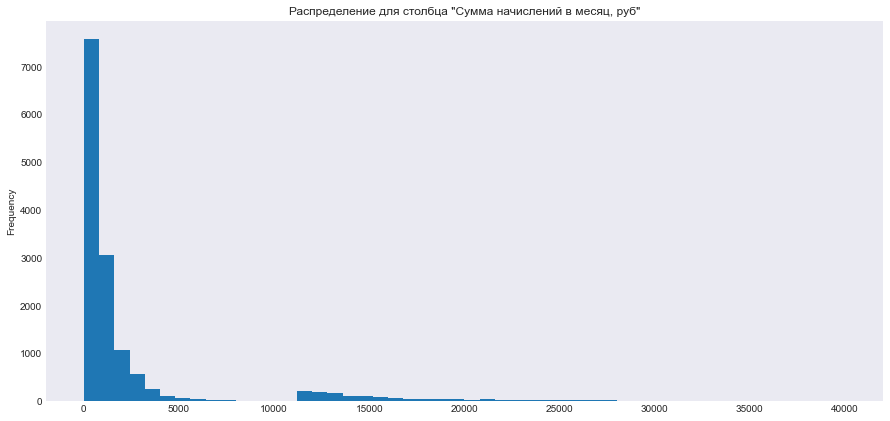

In [19]:
viz_plot('Сумма начислений в месяц, руб', (0, 40000))

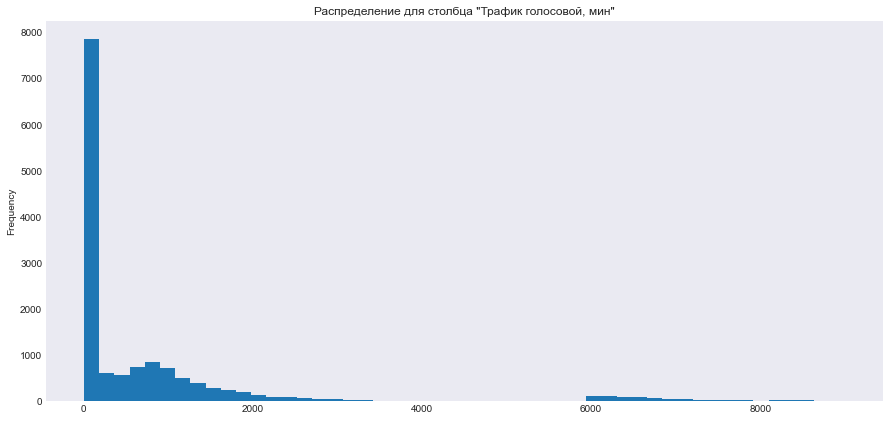

In [20]:
viz_plot('Трафик голосовой, мин', (0, 9000))

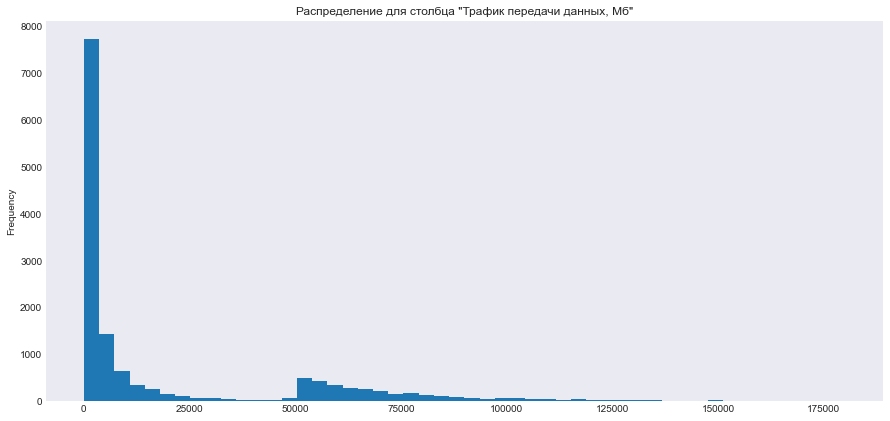

In [21]:
viz_plot('Трафик передачи данных, Мб', (0, 180000))

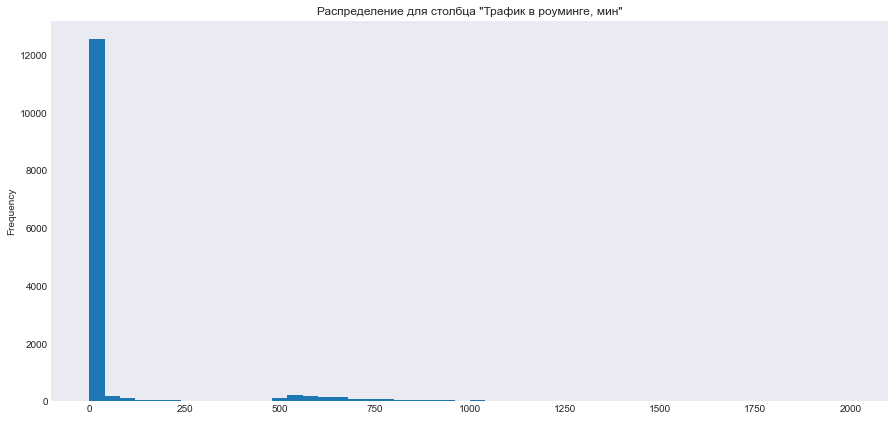

In [22]:
viz_plot('Трафик в роуминге, мин', (0, 2000))

**Вывод по графикам**

Анализируя графики, можем сделать следующие выводы:
1. Те данные, которые были представлены в количественных переменных, не могут иметь отрицательные значения.
2. По графикам видны сильно выбивающиеся значения, которые необходимо срезать, чтобы иметь более правдоподобную картину о данных. 

In [23]:
# Срезаем данные и оставляем только нужные данные
task_1_df_filtered = task_1_df[(task_1_df['Сумма начислений в месяц, руб'] >= 0) & 
                               (task_1_df['Сумма начислений в месяц, руб'] <= 40000) &
                               (task_1_df['Трафик голосовой, мин'] >= 0) &
                               (task_1_df['Трафик голосовой, мин'] <= 9000) &
                               (task_1_df['Трафик передачи данных, Мб'] >= 0) &
                               (task_1_df['Трафик передачи данных, Мб'] <= 180000) &
                               (task_1_df['Трафик в роуминге, мин'] >= 0) &
                               (task_1_df['Трафик в роуминге, мин'] <= 2000)]

**Вывод по аномальным значениям**

Объяснение того, почему срезал данные именно в таком диапазоне:
 1. На графиках распределения видно то, где находится большинство данных, а где какие-то единичные случаи и таких случаев очень мало, они только искажают реальную картину и из-за этого появляется скошенность.
 2. Что касается столбца с суммой начислений, то до 40 000 рублей мне кажется картина более менее реальна, так как такие суммы могут поступать от крупных компаний, которые оплачивают тарифы либо работникам, которые сидят на телефонных звонках, либо оплачивают корпоративные связи. 
 3. Если рассматривать столбец с голосовым трафиком, то я посчитал нужным оставить данные до 9000 минут. Конечно, это очень большое количество, однако есть люди, которые любят поговорить и используют в основном звонки, и опять же, такие тарифы могут покупать компании для холодных звонков с целью привлечения к себе клиентов. 
 4. Рассматривая трафик передачи данных, отмечу, что есть пользователи, которые очень много и долго сидят за интернетом, тем самым расходуют его в очень большом количестве. Это могут быть как физические, так и юридические лица. Физические, например, могут смотреть фильмы на протяжение долгого времени, что съедает много трафика, а юридические - используют много интернета для передачи данных и использования его в рабочих целях внутри своего рабочего дня. Посчитал нужным оставить данные до 180Гб, потому что это наиболее реальная картина для абонента, исходя из распределения.
 5. Рассматривая распределение по этому столбцу, записей после 25 минут крайне мало, однако здесь не так жёстко резал данные, потому что как раз такое распределение показывает нам тех абонентов, которые много путешествуют. 

После того, как мы убрали все выбивающиеся значения, необходимо проверить, сколько данных было удалено, относительно первоначального количества.

In [24]:
cnt_emissions = len(task_1_df) - task_1_df_filtered.shape[0]
percent_emissions = 1 - (task_1_df_filtered.shape[0] / len(task_1_df))
print(f'В абсолютном выражении было удалено {cnt_emissions} записи, относительно первоначального количества это составляет {percent_emissions:.2%}')

В абсолютном выражении было удалено 452 записи, относительно первоначального количества это составляет 3.10%


Видим, что было удалено чуть больше 3%. Так как данные были представлены в плохом состоянии, данный процент считаю нормальным (учитывая общепринятую норму в 10%).

Стоит также заметить, что если бы данные не были очищены от аномальных значений, то результат исследования был бы очень сильно искажён, так как в датасете были представлены сильно выбивающиеся от общей картины значения.

In [25]:
(task_1_df_filtered.groupby('ID абонента')[['Сумма начислений в месяц, руб']].sum()
                                                                        .sort_values(by='Сумма начислений в месяц, руб',
                                                                                     ascending=False)
                                                                        .head()
                                                                                                             
)

,"Сумма начислений в месяц, руб"
ID абонента,
144560886,39935.72
414730268,38919.29
149352798,38893.09
148721637,38878.54
148047518,38656.13


Как ранее было сказано, агрегировать данные по `id` абонента не имеет смысла, так как в этом столбце почти все значения уникальные и как-то это использовать в анализе не получится. Следовательно, будем смотреть на категории используемого устройства.

Для сегментации пользователей можем использовать функцию, которая будет написана для того, чтобы разделить абонентов на группы, после чего будет видно сколько и каких абонентов попало в ту или иную категорию.

In [26]:
# Проверим описательную статистику уже по обработанным данным
task_1_df_filtered[['Сумма начислений в месяц, руб', 'Трафик голосовой, мин', 
                    'Трафик передачи данных, Мб','Трафик в роуминге, мин']].describe()

,"Сумма начислений в месяц, руб","Трафик голосовой, мин","Трафик передачи данных, Мб","Трафик в роуминге, мин"
count,14151.00,14151.00,14151.00,14151.00
mean,2736.89,850.87,21702.42,84.27
std,5575.22,1677.75,33751.64,246.56
min,0.00,0.00,0.00,0.00
25%,313.25,3.85,614.00,0.00
50%,747.42,56.54,3070.26,0.00
75%,1694.26,943.44,43853.95,0.41
max,39935.72,8995.61,179984.76,1996.62


Из описательной статистики по очищенным данным видим, что картина по количественным переменным стала более реалисичной и нет сильно выбивающихся значений от общей массы. 

Далее сделаем сегментацию, выделив несколько характерных признаков на основе профиля абонента, который определялся на основании количественных данных, представленных в датафрейме. Проще говоря, сегментация — это инструмент повышения эффективности работы с клиентами за счет их разделения на разные группы в соответствии с профилем. Сегментация помогает понять, с каким предложением подойти к каждому человеку, чтобы повысить показатель эффективности. 

In [27]:
# Функция для категоризации данных относительно количественных переменных, представленных в датасете
def accrual_amount(number):
    try:
        # Сумма начислений в месяц
        amount = number['Сумма начислений в месяц, руб']
        # Голосовой трафик
        voice_traffic = number['Трафик голосовой, мин']
        # Трафик передачи данных
        data_traffic = number['Трафик передачи данных, Мб']
        # Трафик в роуминге
        roaming_traffic = number['Трафик в роуминге, мин']
        
        # Алгоритм функции
        if amount >= 6000 and data_traffic >= 80000 or voice_traffic >= 6000:
            return 'Корпоративные клиенты'
        
        elif roaming_traffic >= 250:
            return 'Любители путешествовать'
        
        elif 3000 <= amount < 6000 and 40000 <= data_traffic < 80000 or 0 <= voice_traffic < 200:
            return 'Сёрферы интернет-трафика'
                
        elif 2000 <= amount < 3000 and 20000 <= data_traffic < 40000 or 1000 <= voice_traffic < 6000:
            return 'Универсальные пользователи'
                
        elif amount < 2000 and data_traffic < 20000 or 200 <= voice_traffic < 1000:
            return 'Стандартные пользователи'
        else:
            return 'Не определены'
    except:
        return 'ошибка'
# Создаём новый столбец и передаём методу apply собственную функцию
task_1_df_filtered['subscriber_category'] = task_1_df_filtered.apply(accrual_amount, axis=1)

Первоначальная логика функции была такой, что она должна учитывать строго три фактора (то есть одновременно все три условия через оператор `and`), но после пробного исполнения такой функции, было выяснено, что получается слишком много пропусков, так как использовались очень жёсткие критерии категоризации, поэтому было принято решение о том, чтобы смягчить применимые условия и прописать их не только через `and `, но и `or`.

**Вывод по написанной функции**

Пояснение к функции, почему брались именно такие диапазоны для категоризации данных:
 1. Столбец с роумингом учитывался только один раз, исходя из этого определялась категория людей, которые очень любят путешествовать.
 2. Корпоративные клиенты определялись исходя из больших сумм начислений, большого интернет трафика и большого количества голосового трафика, так как есть много компаний, которые тратят всё это в больших объёмах в рабочем процессе.
 3. Сёрферы интернет-трафика - люди, которые являются большими любителями посидеть в интернете (посмотреть видео на ютубе, поиграть в какие-то онлайн игры и просто посидеть в соц. сетях). Эти люди готовы вложить в тариф сумму, равную больше среднестатистической по всем пользователям, используют интернет в большом объёме, и мало используют звонки, так как в основном общаются через discord, telegram и другие мессенджеры, пока играют или вовсе не являются общительными, так как сильно погружены в игровой процесс и их мало интересует реальная жизнь, общение с другими людьми, им больше интересен игровой процесс. 
 4. Универсальные пользователи - абоненты, которые пользуются всем, но понемногу: готовы потратить на тариф не маленькую сумму, используют достаточно большой трафик интернета и любят общаться по телефону достаточно часто. 
 5. Стандартные пользователи - такие пользователи, которые готовы заплатить не сильно большую сумму за свой тариф, используют не так много интернета (до 20 Гб в месяц) и относительно других не так много общаются по телефону

In [28]:
task_1_df_filtered['subscriber_category'].value_counts()

subscriber_category
Сёрферы интернет-трафика      7836
Стандартные пользователи      2399
Универсальные пользователи    1549
Любители путешествовать       1514
Корпоративные клиенты          853
Name: count, dtype: int64

Посмотримна то, какую пользу приносят абоненты, которых ранее разбили на группы. Классификация поможет понять, какая из категорий наиболее перспективная и активная. 

In [29]:
pivot_subscriber = task_1_df_filtered.pivot_table(index='subscriber_category', 
                                                  values=['Сумма начислений в месяц, руб', 'Трафик голосовой, мин', 
                                                          'Трафик передачи данных, Мб', 'Трафик в роуминге, мин'])
pivot_subscriber

,"Сумма начислений в месяц, руб","Трафик в роуминге, мин","Трафик голосовой, мин","Трафик передачи данных, Мб"
subscriber_category,,,,
Корпоративные клиенты,2232.29,37.21,6835.91,6861.52
Любители путешествовать,3716.81,734.54,1296.18,2841.35
Стандартные пользователи,4615.71,6.28,586.82,60604.50
Сёрферы интернет-трафика,453.50,0.28,29.70,12678.05
Универсальные пользователи,10698.27,20.29,1682.84,33712.57


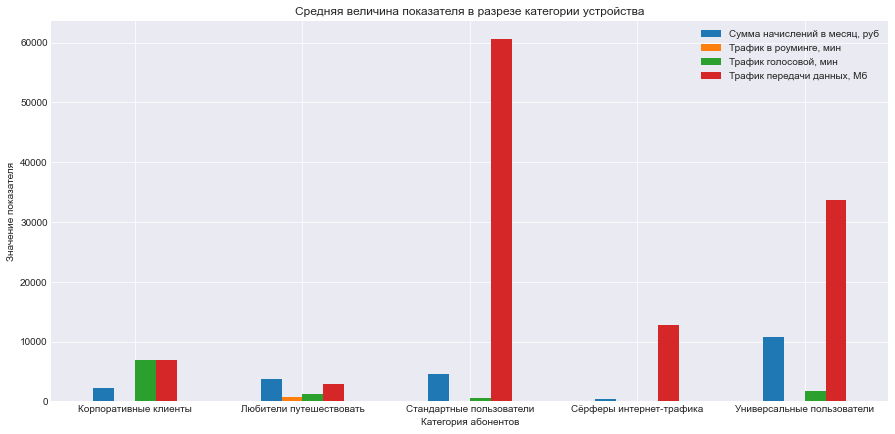

In [30]:
pivot_subscriber.plot(kind='bar', figsize=(15, 7), grid=True)
plt.title('Средняя величина показателя в разрезе категории устройства')
plt.xlabel('Категория абонентов')
plt.ylabel('Значение показателя')
plt.xticks(rotation=360)
plt.show()

**Вывод**

Глядя на график, можно заметить, что:
1. У стандартных пользователей представлен наибольший средний трафик передачи данных, на втором месте у универсальных пользователей, потом уже идут те абоненты, которые долго и много сидят в интернете. 
2. Средняя сумма начислений в месяц в большем объёме представлена у универсальных пользователей. 
3. Голосовым трафиком чаще пользуются корпоративные клиенты.

Теперь проанализируем каждую категорию устройства, что позволит понять, чем люди пользуются больше и какое из них приносит наибольшую пользу компании. Тем самым составим профиль абонента - то, чем пользователь больше всего пользуется, какой трафик использует, сколько Мб тратит и тд., псоле чего уже можно будет делать определённые выводы. 

In [31]:
pivot_category = task_1_df_filtered.pivot_table(index='Категория устройства', 
                               values=['Сумма начислений в месяц, руб', 'Трафик голосовой, мин', 'Трафик передачи данных, Мб',
                                       'Трафик в роуминге, мин'])
pivot_category

,"Сумма начислений в месяц, руб","Трафик в роуминге, мин","Трафик голосовой, мин","Трафик передачи данных, Мб"
Категория устройства,,,,
DATA CARD,84.20,0.03,77.83,82.19
MODEM,564.61,0.24,23.64,7631.38
PHONE,6563.82,167.62,5322.47,783.13
ROUTER,575.58,0.25,50.35,8194.35
SMARTPHONE,4405.57,145.77,1284.47,35418.34
unknown,3085.02,20.79,7032.12,2603.85


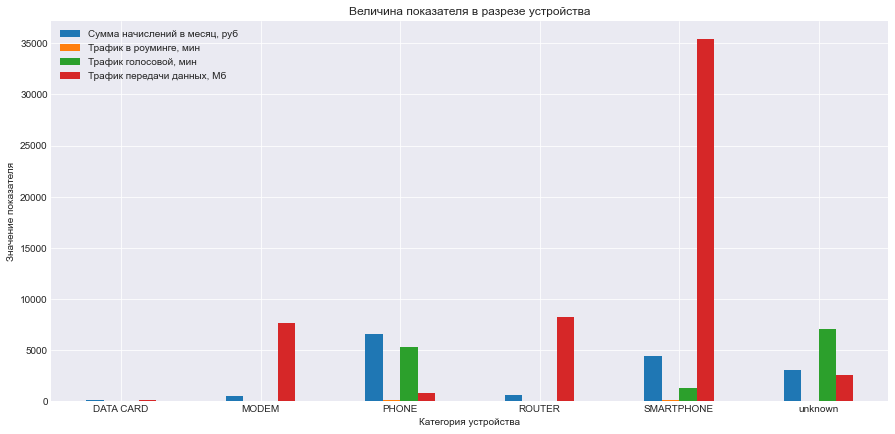

In [32]:
pivot_category.plot(kind='bar', figsize=(15, 7), grid=True)
plt.title('Величина показателя в разрезе устройства')
plt.xlabel('Категория устройства')
plt.ylabel('Значение показателя')
plt.xticks(rotation=360)
plt.show()

**Вывод**

Рассматривая сводную таблицу по среднему использованию каждого из показателей в разрезе устройства, можно заметить следующее:
 1. Абоненты, обладающие смартфоном и телефоном, в среднем, готовы тратить наибольшую сумму на использования своего тарифа.
 2. Трафик в роуминге особым спросом пользуется у абонентов, имеющие смартфон и телефон. Всё логично, потому что эти устройства сейчас, как правило, беспроводные и их можно брать с собой куда угодно. 
 3. Голосовым трафиком больше всего пользуются обладатели неизвестной категории устройства (unknown) и телефона.
 4. Интернет трафик в подавляющем объёме используют люди, имеющие смартфоны, после них уже люди, у которых есть роутер. 
 
Стоит также отметить тот факт, что неизвестная категория устройства пользуется достаточным спросом. Следует обратить на это пристальное внимание и передать данную информацию коллегам, потому что возможно, какие-то важные данные утеряны и из нужно восстановить. 
Данную сводную таблицу можно также использовать с целью классификации пользователей: запускать таргетированную рекламу на абонентов, которые имеют определённые устройства, с целью предлагать им более выгодные тарифы.

In [33]:
task_1_df_filtered['Категория устройства'].value_counts()

Категория устройства
SMARTPHONE    7873
MODEM         3026
DATA CARD     2386
ROUTER         570
PHONE          257
unknown         39
Name: count, dtype: int64

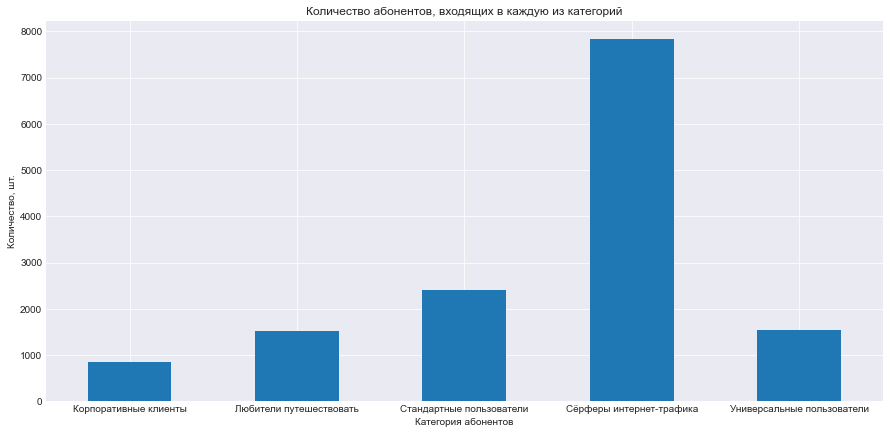

In [34]:
task_1_df_filtered.groupby('subscriber_category')['subscriber_category'].count().plot(kind='bar', figsize=(15, 7),
                                                                                      grid=True)
plt.title('Количество абонентов, входящих в каждую из категорий')
plt.xlabel('Категория абонентов')
plt.ylabel('Количество, шт.')
plt.xticks(rotation=360)
plt.show()

**Вывод**

Анализируя категории, полученные путём классификации абонентов по их профилю, можно сделать следующие выводы:
1. Подавляющее большинство в нашем датасете представлено тех абонентов, которые очень много используют интернет. 
2. На втором месте представлены стандартные пользователи и уже на третьем - универсальные. 

Исходя из такого распределения по категориям, следует перераспределять силы и средства компании в приоритетных направлениях, чтобы предлагать пользователям компании нужные и выгодные тарифы, с целью их удержания и вовлечения.

## Итоговый вывод по 1 заданию

Варианты того, как можно использовать предложенные классификации. Для каждой группы абонентов можно предложить персонализированные предложения. 

Например, для "Корпоративных клиентов" можно предложить специальные корпоративные тарифы или услуги

Для "Сёрферов интернет-трафика" - дополнительные пакеты интернет-трафика или тарифы с более высокой скоростью, чтобы они могли играть на большой скорости и скачивать то, что им захочется

Для "Стандартных пользователей" - простые и доступные тарифы, которые не будут иметь каких-то излишеств, там будет включено только то, что им действительно необходимо

Для "Универсальных абонентов" - предложить что-то среднее, найти золотую середину, чтобы им было комфортно пользоваться всем и понемногу, так как им не захочется переплачивать за то, что они не используют, следовательно, такие абоненты будут искать более выгодные тарифы у конкурентов, а такого допустить нельзя. 

Для "Любителей путешествовать" можно предложить такие персонализированные тарифы, где будет не так много интернета и минут внутри страны, зато они будут комфортно себя чувствовать за границей, так как достаточно часто там бывают (лтбо по работе, либо для отдыха). Однако можно сделать и так, чтобы с этим тарифом они себя комфортно чувствовали как на территории своей страны, так и за её пределами. 

## Задание 4.
На листах 1 и 2 приведены данные по абонентской базе и выручке.

Необходимо рассчитать среднюю выручку от активного абонента по сегменту B2B в разрезе филиалов, показать помесячную динамику. Выручка должна быть указана в руб. без НДС на одного абонента.

In [35]:
subscriber_base = pd.read_excel('Тестовое задание для кандидатов 2022.xlsx', sheet_name='Лист1')
subscriber_base.head()

,Месяц (YYYYMM),Филиал,Регион клиента (Hyperion),Сегмент рынка,"Кол-во активных абонентов на конец периода, шт."
0,201701,Дальневосточный филиал,Амурская область,B2B,13590
1,201701,Дальневосточный филиал,Амурская область,B2C,238181
2,201701,Дальневосточный филиал,Амурская область,B2G,9455
3,201701,Дальневосточный филиал,Амурская область,B2O,0
4,201701,Дальневосточный филиал,Еврейская АО,B2B,6444


In [36]:
# Информация по абонентской базе
subscriber_base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1934 entries, 0 to 1933
Data columns (total 5 columns):
 #   Column                                           Non-Null Count  Dtype 
---  ------                                           --------------  ----- 
 0   Месяц (YYYYMM)                                   1934 non-null   int64 
 1   Филиал                                           1934 non-null   object
 2   Регион клиента (Hyperion)                        1828 non-null   object
 3   Сегмент рынка                                    1844 non-null   object
 4   Кол-во активных абонентов на конец периода, шт.  1934 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 75.7+ KB


In [37]:
revenue_subscribers = pd.read_excel('Тестовое задание для кандидатов 2022.xlsx', sheet_name='Лист2')
revenue_subscribers.head()

,Месяц (YYYYMM),Филиал,Сегмент рынка,"Выручка, тыс руб., без НДС"
0,201701,Дальневосточный филиал,B2B,54949.08
1,201701,Дальневосточный филиал,B2C,1023969.75
2,201701,Дальневосточный филиал,B2G,21139.21
3,201701,Дальневосточный филиал,B2O,0.39
4,201701,Кавказский филиал,B2B,89872.08


In [38]:
# Информация по выручке от абонентов
revenue_subscribers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 4 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Месяц (YYYYMM)              201 non-null    int64  
 1   Филиал                      201 non-null    object 
 2   Сегмент рынка               189 non-null    object 
 3   Выручка, тыс руб., без НДС  201 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.4+ KB


Видим следующие проблемы в данных: столбец с месяцем представлен в виде целого числа в обоих датасетах

Перед тем, как начать исследование, необходимо исправить эти недочёты, чтобы можно было корректно анализировать данные.

In [39]:
# Исправляем тип данных в столбцах с датой (также рабочий метод)
subscriber_base['Месяц (YYYYMM)'] = pd.to_datetime(subscriber_base['Месяц (YYYYMM)'], format='%Y%m')
revenue_subscribers['Месяц (YYYYMM)'] = pd.to_datetime(revenue_subscribers['Месяц (YYYYMM)'], format='%Y%m')

Теперь нужно проверить то, как отработали методы по предобработке данных

In [40]:
subscriber_base.head()

,Месяц (YYYYMM),Филиал,Регион клиента (Hyperion),Сегмент рынка,"Кол-во активных абонентов на конец периода, шт."
0,2017-01-01,Дальневосточный филиал,Амурская область,B2B,13590
1,2017-01-01,Дальневосточный филиал,Амурская область,B2C,238181
2,2017-01-01,Дальневосточный филиал,Амурская область,B2G,9455
3,2017-01-01,Дальневосточный филиал,Амурская область,B2O,0
4,2017-01-01,Дальневосточный филиал,Еврейская АО,B2B,6444


In [41]:
revenue_subscribers.head()

,Месяц (YYYYMM),Филиал,Сегмент рынка,"Выручка, тыс руб., без НДС"
0,2017-01-01,Дальневосточный филиал,B2B,54949.08
1,2017-01-01,Дальневосточный филиал,B2C,1023969.75
2,2017-01-01,Дальневосточный филиал,B2G,21139.21
3,2017-01-01,Дальневосточный филиал,B2O,0.39
4,2017-01-01,Кавказский филиал,B2B,89872.08


Далее посмотрим на столбец с месяцем, за одинаковый ли период даны данные и совпадают ли эти значения. Если да, то можно соединить две таблицы именно по этому полю.

In [42]:
subscriber_base['Месяц (YYYYMM)'].unique()

<DatetimeArray>
['2017-01-01 00:00:00', '2017-02-01 00:00:00', '2017-03-01 00:00:00',
 '2017-04-01 00:00:00', '2017-05-01 00:00:00', '2017-06-01 00:00:00']
Length: 6, dtype: datetime64[ns]

In [43]:
revenue_subscribers['Месяц (YYYYMM)'].unique()

<DatetimeArray>
['2017-01-01 00:00:00', '2017-02-01 00:00:00', '2017-03-01 00:00:00',
 '2017-04-01 00:00:00', '2017-05-01 00:00:00', '2017-06-01 00:00:00']
Length: 6, dtype: datetime64[ns]

На данном этапе необходимо соединить два датасета в один, чтобы можно было уже приступить к исследованию данных. Видим, что данные по месяцам абсолютно одинаковы, можем соединить именно по этому столбцу. Однако, при таком соединении, получается слишком много заспией. 

Также, стоит заметить, что в таблицах нет первичного и вторичного ключей, поэтому можно соединять данные и по двум полям: `Филиал` и `Сегмент рынка`, а не по какому-то одному из них, во избежании дубликатов и помноженных лишних записей. 

In [44]:
total_df = subscriber_base.merge(revenue_subscribers, on=['Филиал', 'Сегмент рынка'], how='left')
total_df.head()

,Месяц (YYYYMM)_x,Филиал,Регион клиента (Hyperion),Сегмент рынка,"Кол-во активных абонентов на конец периода, шт.",Месяц (YYYYMM)_y,"Выручка, тыс руб., без НДС"
0,2017-01-01,Дальневосточный филиал,Амурская область,B2B,13590,2017-01-01,54949.08
1,2017-01-01,Дальневосточный филиал,Амурская область,B2B,13590,2017-02-01,52572.03
2,2017-01-01,Дальневосточный филиал,Амурская область,B2B,13590,2017-03-01,56091.22
3,2017-01-01,Дальневосточный филиал,Амурская область,B2B,13590,2017-04-01,53383.59
4,2017-01-01,Дальневосточный филиал,Амурская область,B2B,13590,2017-05-01,54386.30


In [45]:
total_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11595 entries, 0 to 11594
Data columns (total 7 columns):
 #   Column                                           Non-Null Count  Dtype         
---  ------                                           --------------  -----         
 0   Месяц (YYYYMM)_x                                 11595 non-null  datetime64[ns]
 1   Филиал                                           11595 non-null  object        
 2   Регион клиента (Hyperion)                        10959 non-null  object        
 3   Сегмент рынка                                    11055 non-null  object        
 4   Кол-во активных абонентов на конец периода, шт.  11595 non-null  int64         
 5   Месяц (YYYYMM)_y                                 11595 non-null  datetime64[ns]
 6   Выручка, тыс руб., без НДС                       11595 non-null  float64       
dtypes: datetime64[ns](2), float64(1), int64(1), object(3)
memory usage: 634.2+ KB


Видим, что соединение таблиц произвелось корректным образом.

In [46]:
# Срезаем данные по нужному нам сегменту
b2b_df = total_df[total_df['Сегмент рынка'] == 'B2B']
b2b_df.head()

,Месяц (YYYYMM)_x,Филиал,Регион клиента (Hyperion),Сегмент рынка,"Кол-во активных абонентов на конец периода, шт.",Месяц (YYYYMM)_y,"Выручка, тыс руб., без НДС"
0,2017-01-01,Дальневосточный филиал,Амурская область,B2B,13590,2017-01-01,54949.08
1,2017-01-01,Дальневосточный филиал,Амурская область,B2B,13590,2017-02-01,52572.03
2,2017-01-01,Дальневосточный филиал,Амурская область,B2B,13590,2017-03-01,56091.22
3,2017-01-01,Дальневосточный филиал,Амурская область,B2B,13590,2017-04-01,53383.59
4,2017-01-01,Дальневосточный филиал,Амурская область,B2B,13590,2017-05-01,54386.30


Далее находим среднюю выручку на одного активного абонента. Для этого необходимо поделить показатель выручки на количество активных абонентов на конец периода.

In [47]:
# Переводим выручку из тыс. руб в рубли
b2b_df['Выручка, тыс руб., без НДС'] = b2b_df['Выручка, тыс руб., без НДС'] * 1000
b2b_df = b2b_df.rename(columns={'Выручка, тыс руб., без НДС': 'Выручка, руб., без НДС'})
b2b_df.head()

,Месяц (YYYYMM)_x,Филиал,Регион клиента (Hyperion),Сегмент рынка,"Кол-во активных абонентов на конец периода, шт.",Месяц (YYYYMM)_y,"Выручка, руб., без НДС"
0,2017-01-01,Дальневосточный филиал,Амурская область,B2B,13590,2017-01-01,54949082.82
1,2017-01-01,Дальневосточный филиал,Амурская область,B2B,13590,2017-02-01,52572027.00
2,2017-01-01,Дальневосточный филиал,Амурская область,B2B,13590,2017-03-01,56091217.18
3,2017-01-01,Дальневосточный филиал,Амурская область,B2B,13590,2017-04-01,53383593.95
4,2017-01-01,Дальневосточный филиал,Амурская область,B2B,13590,2017-05-01,54386295.67


Так как дальне шам необходимо будет посчитать динамику в разрезе филиалов, уберу из датасета `Столичный филиал`, потому что там большинство данных сильно отличаются от всех остальных. Возможно, изначально там данные представлены в рублях, а может и совершены какие-то ошибки. 

Также стоит предположить, что данные в порядке, так как всё-таки филиал находится в столице и такие показатели для Москвы это вполне себе нормально, но, чтобы на графиках всё визуализировалось красиво, уберём из анализа информацию об этом филиале.

In [48]:
b2b_df = b2b_df[b2b_df['Филиал'] != 'Столичный филиал']

In [49]:
b2b_df['Средняя выручка на одного активного абонента, руб.'] = (b2b_df['Выручка, руб., без НДС'] / 
                                         b2b_df['Кол-во активных абонентов на конец периода, шт.']
                                         )
b2b_df.head()

,Месяц (YYYYMM)_x,Филиал,Регион клиента (Hyperion),Сегмент рынка,"Кол-во активных абонентов на конец периода, шт.",Месяц (YYYYMM)_y,"Выручка, руб., без НДС","Средняя выручка на одного активного абонента, руб."
0,2017-01-01,Дальневосточный филиал,Амурская область,B2B,13590,2017-01-01,54949082.82,4043.35
1,2017-01-01,Дальневосточный филиал,Амурская область,B2B,13590,2017-02-01,52572027.00,3868.43
2,2017-01-01,Дальневосточный филиал,Амурская область,B2B,13590,2017-03-01,56091217.18,4127.39
3,2017-01-01,Дальневосточный филиал,Амурская область,B2B,13590,2017-04-01,53383593.95,3928.15
4,2017-01-01,Дальневосточный филиал,Амурская область,B2B,13590,2017-05-01,54386295.67,4001.93


После того, как была найдена средняя выручка на одного активного абонента, необходимо посмотреть на помесячную динамику данной метрики в разрезе филиалов.

Однако, в сводной таблице будет найден медианный показатель по всем месяца, так как в данных есть сильно выбивающиеся значения, которые искажают данные, медиана будет отражать наиболее правдоподобную картину. По сути, поделив выручку на количество абонентов, мы нашли, сколько в среднем выручки приходится на одного пользователя. 

In [50]:
pivot_revenue = b2b_df.pivot_table(index='Филиал', columns='Месяц (YYYYMM)_x', 
                                   values='Средняя выручка на одного активного абонента, руб.', 
                                   aggfunc='median')
pivot_revenue

Месяц (YYYYMM)_x,2017-01-01,2017-02-01,2017-03-01,2017-04-01,2017-05-01,2017-06-01
Филиал,,,,,,
Дальневосточный филиал,3929.74,3953.47,3919.61,3858.20,3853.21,3664.38
Кавказский филиал,8617.93,8619.90,8389.50,8170.36,8008.05,7801.86
Поволжский филиал,4857.52,4818.07,4757.76,4675.11,4621.97,4559.94
Северо-Западный филиал,10501.14,10414.52,10330.66,10221.84,10135.24,10034.57
Сибирский филиал,1885.62,1856.09,1802.55,1795.53,1783.26,1747.93
Уральский филиал,4245.87,4211.50,4140.03,4125.31,4156.08,3966.20
Центральный филиал,2822.80,2804.01,2745.24,2725.00,2687.46,2655.22


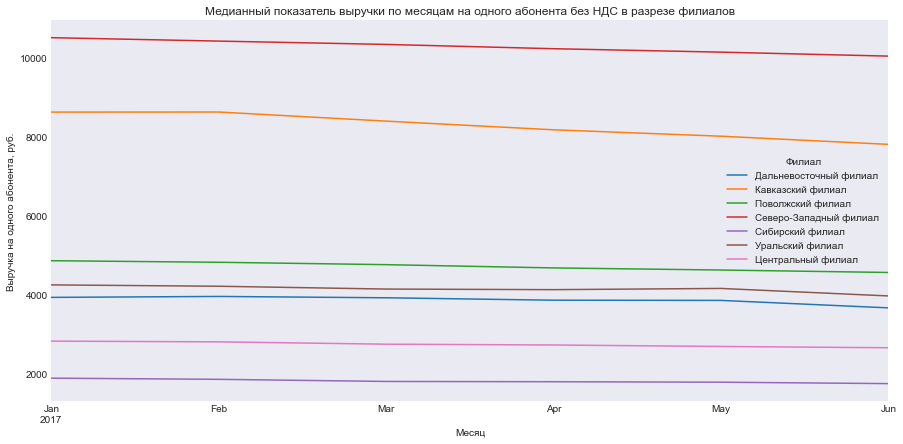

In [51]:
pivot_revenue.T.plot(figsize=(15, 7))
plt.title('Медианный показатель выручки по месяцам на одного абонента без НДС в разрезе филиалов')
plt.xlabel('Месяц')
plt.ylabel('Выручка на одного абонента, руб.')
plt.show()

## Итоговый вывод по 4 заданию

Анализируя помесячную динамику средней выручки от активного абонента по сегменту B2B в разрезе филиалов, можно сделать следующие выводы: 

1. Показатель выручки по всем филиалам на протяжение всего рассматриваемого периода стабильный и никаких колебаний по ней не наблюдается.
2. Наибольшая выручка на одного активного абонента представлена в Северо-Западном и Кавказском филиалах. Выручка остальных филиалов находится в диапазоне примерно от 2000 до 5000 рублей. 